In [857]:
#importing of libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [858]:
#I used jupyter notebook in visual basic code this is loading the dataset into a pandas DataFrame
source='C:/Users/knigh/Downloads/WA_Fn-UseC_-Telco-Customer-Churn_G9_new_15.csv'
data = pd.read_csv(source)

In [810]:
data2=pd.read_csv(source)

In [859]:
#analysing dtypes of features, the dataset has two float,one integer and 18 object

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   int64  
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [860]:
# I decided to convert columns TotalCharges into Numeric and SeniorCitizen into object for better exploratory data analysis
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce') 
data['SeniorCitizen']=data['SeniorCitizen'].astype('object')

In [861]:
#Re_anaylsing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   object 
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [862]:
# Checking for missing values in dataset,it shows 51 missing data
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              18
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      28
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       5
TotalCharges        11
Churn                0
dtype: int64

In [863]:
#Removing of missing dataset 
data=data.dropna()

In [864]:
#checking to see if all was removed
data.isnull().sum().sum()

0

In [865]:
#checking for duplicates
data.duplicated().sum()

2

In [866]:
# dropped duplicates
data=data.drop_duplicates()

In [867]:
# Rechecking data to reassure the count and dtype.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6983 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6983 non-null   object 
 1   gender            6983 non-null   object 
 2   SeniorCitizen     6983 non-null   object 
 3   Partner           6983 non-null   object 
 4   Dependents        6983 non-null   object 
 5   tenure            6983 non-null   float64
 6   PhoneService      6983 non-null   object 
 7   MultipleLines     6983 non-null   object 
 8   InternetService   6983 non-null   object 
 9   OnlineSecurity    6983 non-null   object 
 10  OnlineBackup      6983 non-null   object 
 11  DeviceProtection  6983 non-null   object 
 12  TechSupport       6983 non-null   object 
 13  StreamingTV       6983 non-null   object 
 14  StreamingMovies   6983 non-null   object 
 15  Contract          6983 non-null   object 
 16  PaperlessBilling  6983 non-null   object 


In [868]:
# checking info of numerical values
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000
mean,32.387799,64.839081,2281.775218
std,24.534585,30.140637,2268.485701
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,401.200000
50%,29.000000,70.400000,1395.050000
75%,55.000000,89.950000,3783.200000
max,72.000000,118.750000,8684.800000


In [869]:
# removing outliers by using inter quartile range formula
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
outlier_removal=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

C:\Users\knigh\AppData\Local\Temp\ipykernel_29064\454730505.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_removal=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


In [870]:
#updating the data
data=outlier_removal

In [871]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6983 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6983 non-null   object 
 1   gender            6983 non-null   object 
 2   SeniorCitizen     6983 non-null   object 
 3   Partner           6983 non-null   object 
 4   Dependents        6983 non-null   object 
 5   tenure            6983 non-null   float64
 6   PhoneService      6983 non-null   object 
 7   MultipleLines     6983 non-null   object 
 8   InternetService   6983 non-null   object 
 9   OnlineSecurity    6983 non-null   object 
 10  OnlineBackup      6983 non-null   object 
 11  DeviceProtection  6983 non-null   object 
 12  TechSupport       6983 non-null   object 
 13  StreamingTV       6983 non-null   object 
 14  StreamingMovies   6983 non-null   object 
 15  Contract          6983 non-null   object 
 16  PaperlessBilling  6983 non-null   object 


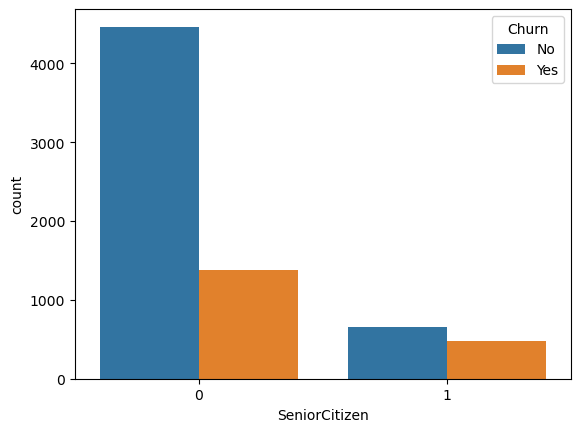

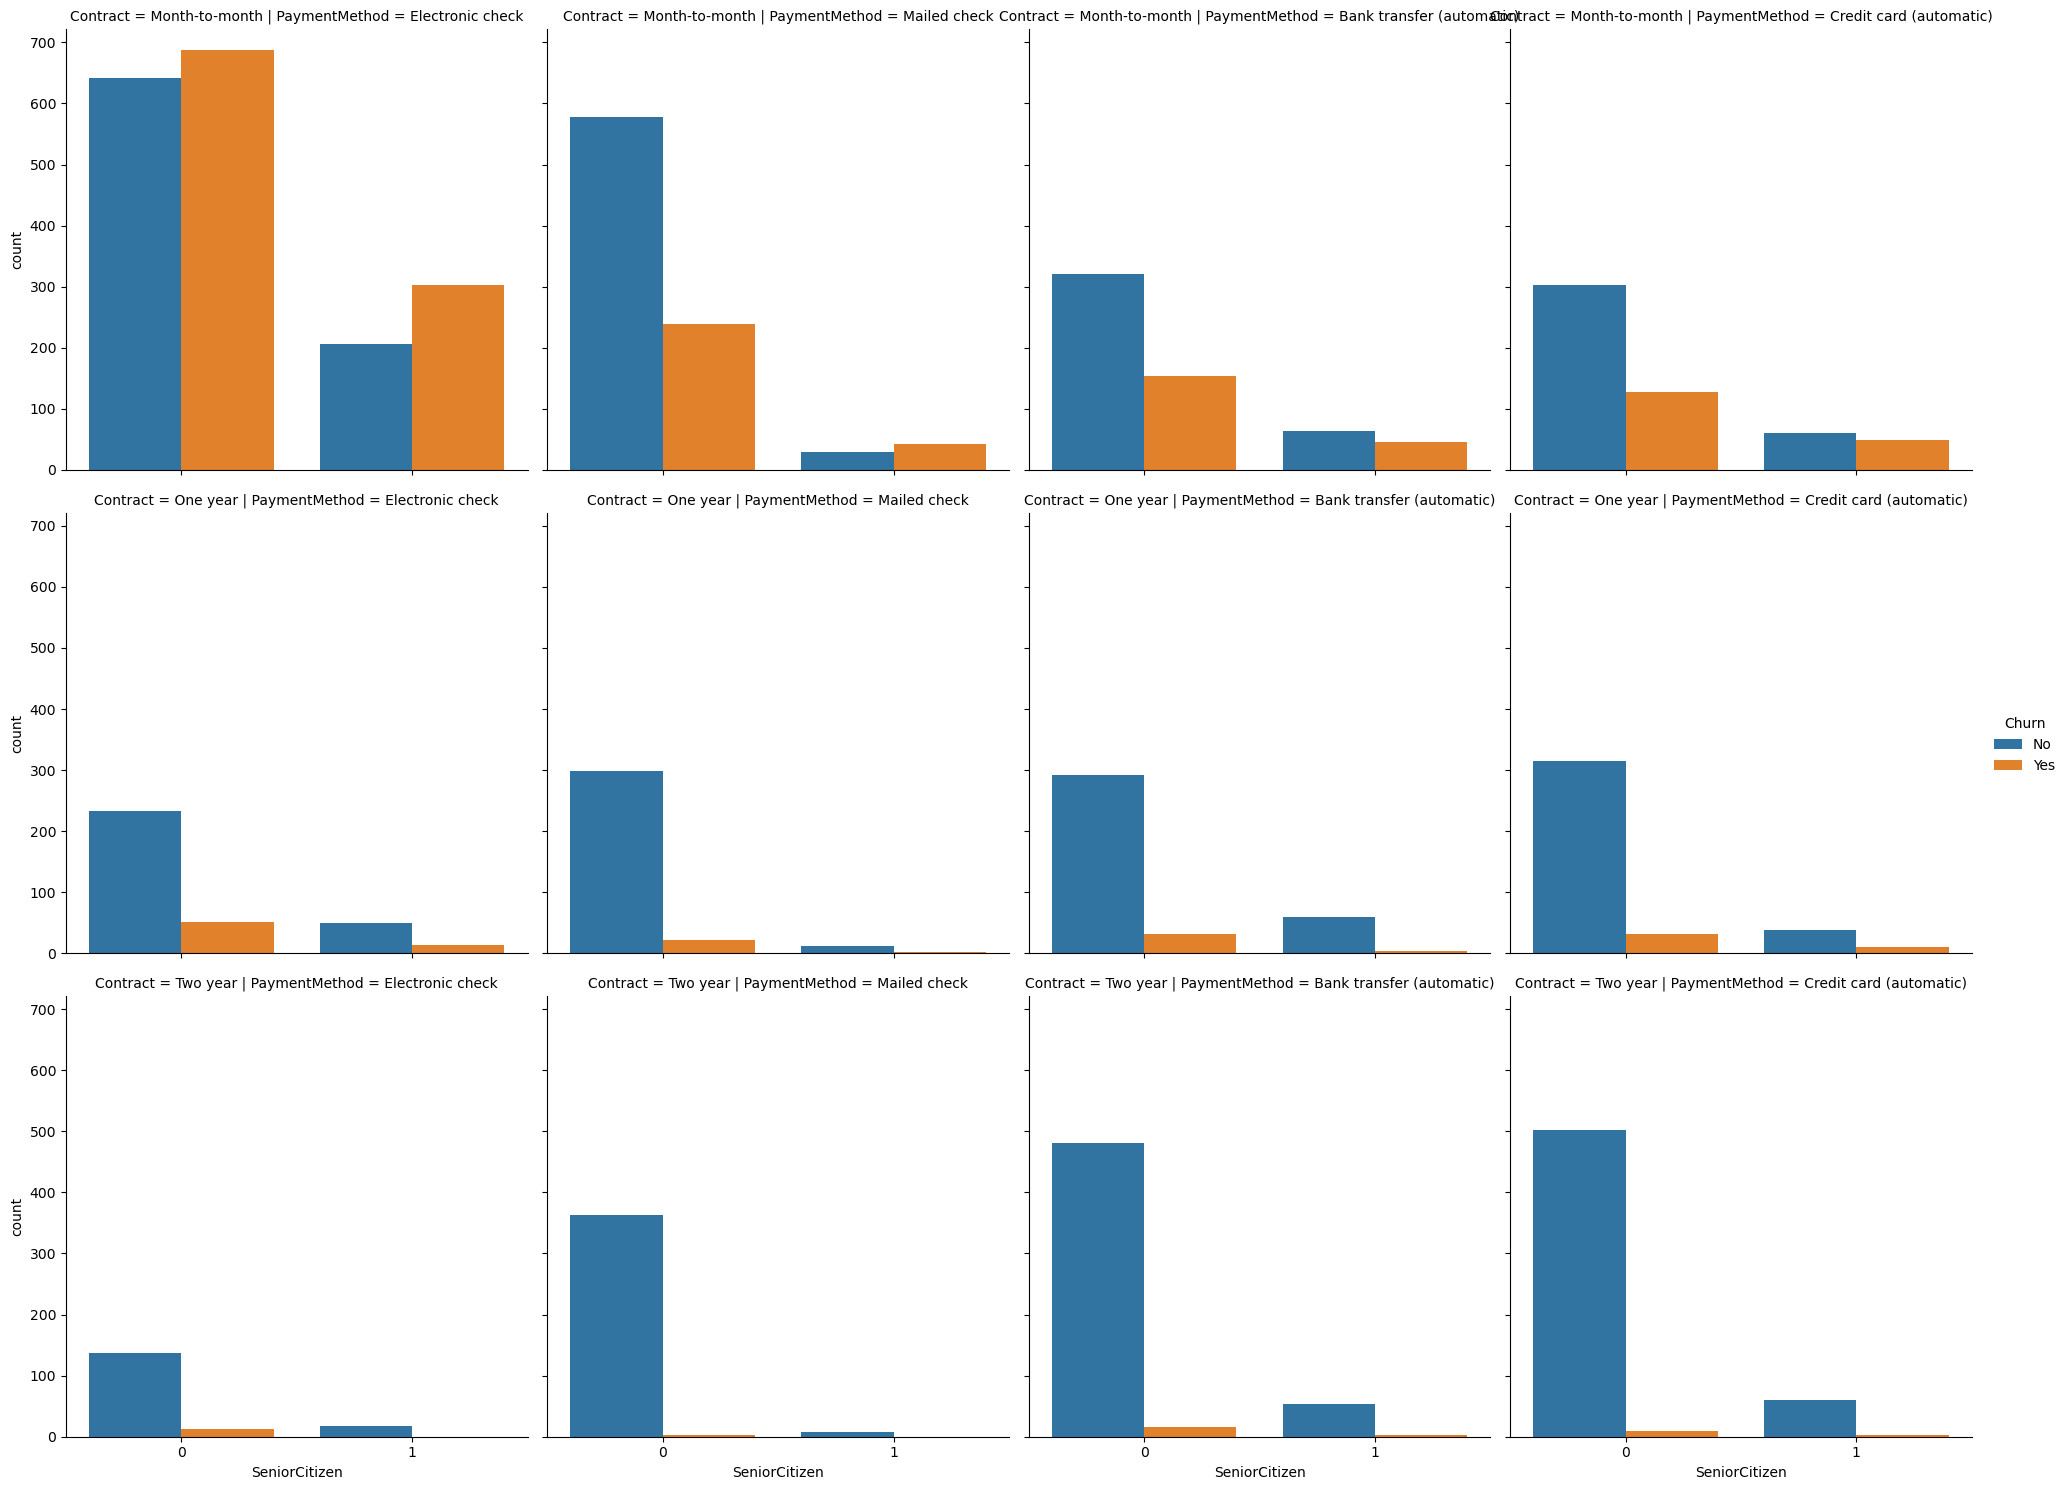

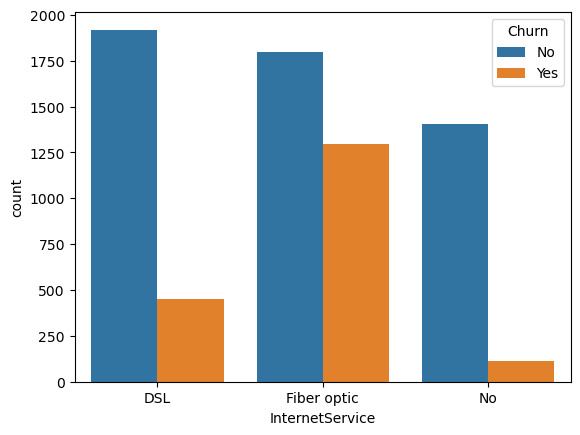

In [872]:
# plotted a countplot to compare rate of senior citizen and churn: from observation seems rate of churn in both senior and non senior is low compared to the reverse
# potted a count to compare type of internet service and churn: from observation they all seem to be doing well with higher no churn rate than churn but fiber optics product need to improve its sastisfaction as it has a higher churn than the rest
#plotted a count plot using the cat function using senior citizen to get a more detailed look on all the customers rather than individually added extra row and column to give a view of the contracts and payment types: it seems non-senior citizens have more month to month contract with eletronic check but also have a high churn rate. Also amongst all other payment platform the two popular payment methods are eletronic check and mailed checked.
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)
plt.show()
sns.catplot(x='SeniorCitizen',hue='Churn',data=data,kind='count',col='PaymentMethod',row='Contract')
plt.show()
sns.countplot(x='InternetService',hue='Churn',data=data)
plt.show()

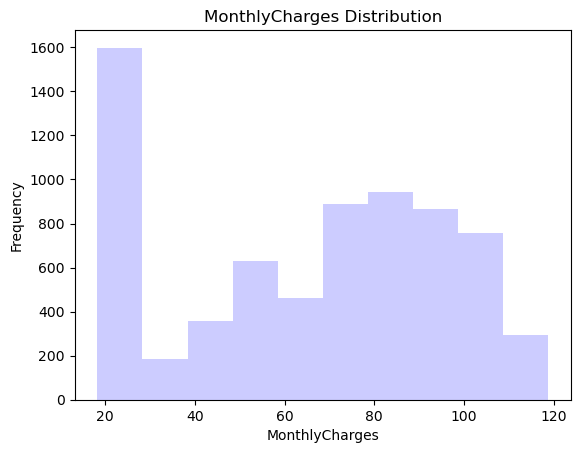

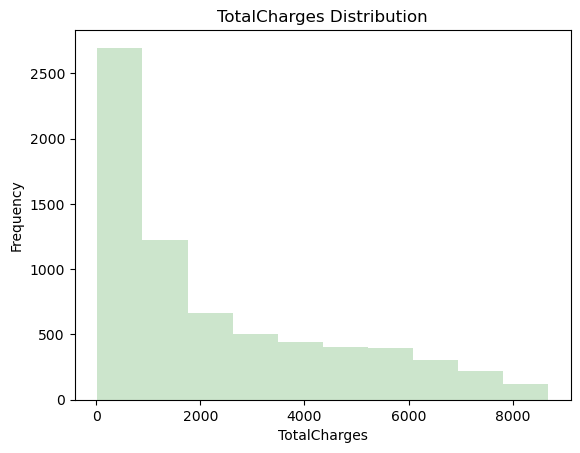

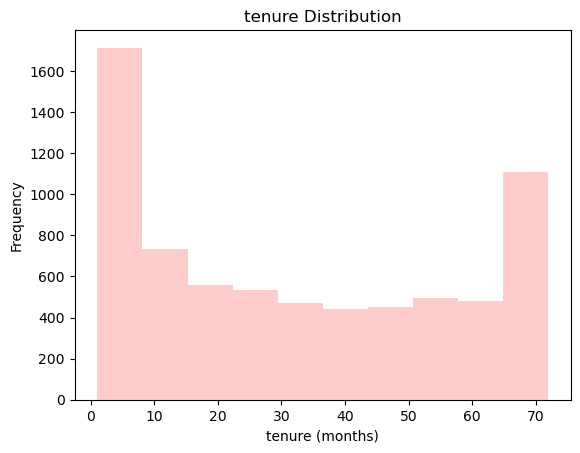

In [873]:
#did a histogram for the numerical data to get the the probability distrubtion aside total charges which is left skewed they seem to have irregular skewedness
plt.hist(data['MonthlyCharges'], bins=10, alpha=0.2, color='blue')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.title('MonthlyCharges Distribution')
plt.show()

# Plot Yearly Charges histogram
plt.hist(data['TotalCharges'], bins=10, alpha=0.2, color='green')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('TotalCharges Distribution')
plt.show()

# Plot Tenure histogram
plt.hist(data['tenure'], bins=10, alpha=0.2, color='red')
plt.xlabel('tenure (months)')
plt.ylabel('Frequency')
plt.title('tenure Distribution')
plt.show()

In [874]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000
mean,32.387799,64.839081,2281.775218
std,24.534585,30.140637,2268.485701
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,401.200000
50%,29.000000,70.400000,1395.050000
75%,55.000000,89.950000,3783.200000
max,72.000000,118.750000,8684.800000


In [875]:
# checking for the numerical figures of skewness
MonthlyCharges_skewness=(3*(64.84-70.40))/30.14
tenure_skewness=(3*(32.39-29.00))/24.53
TotalCharges_skewness=(3*(2281.78-1395.05))/2268.49
print("monthly charges:",MonthlyCharges_skewness)
print("tenure_skewness:",tenure_skewness)
print("Totalcharges :",TotalCharges_skewness)

monthly charges: -0.5534173855341741
tenure_skewness: 0.4145943742356299
Totalcharges : 1.17266992580968


<AxesSubplot:>

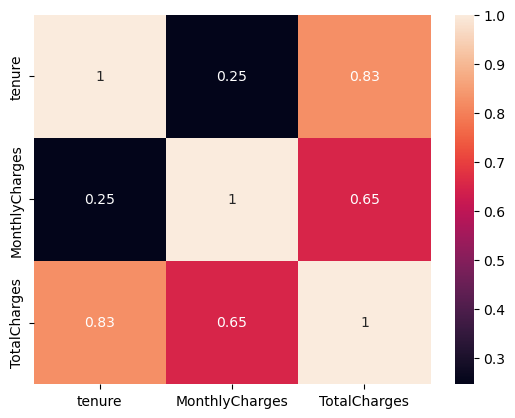

In [876]:
# correlation matrix using a heatmap of numerical figures in the DataFrame
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

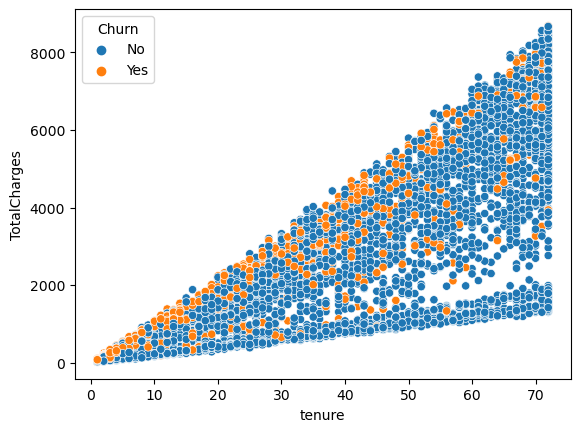

In [877]:
# scatter plot of correlation between tenure and totalcharges in respect to churn
# shows a relative correlation
var1=data['tenure']
var2=data['TotalCharges']
target_var=data['Churn']
sns.scatterplot(data=data,x=var1,y=var2,hue=target_var)

<AxesSubplot:xlabel='TotalCharges', ylabel='TotalCharges'>

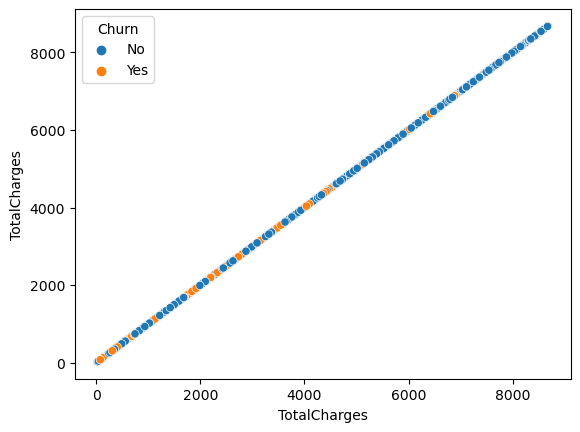

In [878]:
# scatter plot of correlation between totalcharges and totalcharges in respect to churn
#shows very high correlation
var3=data['TotalCharges']
var4=data['TotalCharges']
sns.scatterplot(data=data,x=var3,y=var4,hue=target_var)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

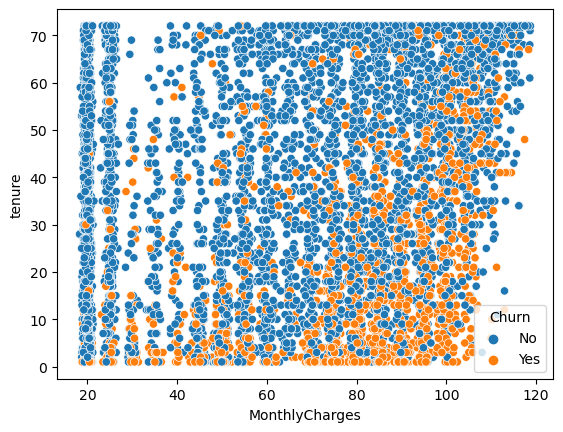

In [879]:
# scatter plot of correlation between tenure and monthlycharges in respect to churn
var5=data['MonthlyCharges']    #shows tenure and Monthly charges are not correlated
var6=data['tenure']
sns.scatterplot(data=data,x=var5,y=var6,hue=target_var)

In [880]:
#Scaling using standardscaler
ds=data[['MonthlyCharges','TotalCharges','tenure']] 
type(ds)
ds=(ds-ds.mean())/ds.std()

In [881]:
# updating result of the scaling into main data
data.update(ds)


In [882]:
# checking to see if its scaled
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.279329,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160861,-0.992700,No
1,5575-GNVDE,Male,0,No,No,0.065711,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.261742,-0.172924,No
2,3668-QPYBK,Male,0,No,No,-1.238570,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.364594,-0.958183,Yes
3,7795-CFOCW,Male,0,No,No,0.514058,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.194414,No
4,9237-HQITU,Female,0,No,No,-1.238570,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.194452,-0.939008,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,-0.341877,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.662259,-0.128401,No
7039,2234-XADUH,Female,0,Yes,Yes,1.614545,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.272731,2.239875,No
7040,4801-JZAZL,Female,0,Yes,Yes,-0.871741,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.169155,-0.853135,No
7041,8361-LTMKD,Male,1,Yes,No,-1.157052,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.317210,-0.870702,Yes


In [883]:
# getting data columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [884]:
# encoding of categorical data to mumeric using one hot encoding
encoded=pd.get_dummies(data,columns=['gender','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Partner','Dependents','InternetService','Contract','PaymentMethod','MultipleLines','OnlineBackup'])


In [885]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.279329,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160861,-0.992700,No
1,5575-GNVDE,Male,0,No,No,0.065711,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.261742,-0.172924,No
2,3668-QPYBK,Male,0,No,No,-1.238570,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.364594,-0.958183,Yes
3,7795-CFOCW,Male,0,No,No,0.514058,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.194414,No
4,9237-HQITU,Female,0,No,No,-1.238570,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.194452,-0.939008,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,-0.341877,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.662259,-0.128401,No
7039,2234-XADUH,Female,0,Yes,Yes,1.614545,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.272731,2.239875,No
7040,4801-JZAZL,Female,0,Yes,Yes,-0.871741,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.169155,-0.853135,No
7041,8361-LTMKD,Male,1,Yes,No,-1.157052,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.317210,-0.870702,Yes


In [886]:
#updating the result of encoding into the main data
data=pd.concat([data.drop(['gender','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Partner','Dependents','InternetService','Contract','PaymentMethod','MultipleLines','OnlineBackup'],axis=1,inplace=True),encoded])

In [887]:
# converting churn to numeric and citizen to int and dropping customer id
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].astype(int)
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)
data=data.drop('customerID',axis=1)

In [888]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6983 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            6983 non-null   int32  
 1   tenure                                   6983 non-null   float64
 2   MonthlyCharges                           6983 non-null   float64
 3   TotalCharges                             6983 non-null   float64
 4   Churn                                    6983 non-null   int32  
 5   gender_Female                            6983 non-null   uint8  
 6   gender_Male                              6983 non-null   uint8  
 7   PhoneService_No                          6983 non-null   uint8  
 8   PhoneService_Yes                         6983 non-null   uint8  
 9   OnlineSecurity_No                        6983 non-null   uint8  
 10  OnlineSecurity_No internet service       6983 no

In [891]:
# using corrwith to select features for prediction
x=data.drop('Churn',axis=1)
target_variable = data['Churn']
num_features = 5
corr_with_target = x.corrwith(target_variable)
selected_features = corr_with_target.sort_values(ascending=False).head(num_features).index.tolist()
selected_features.append(target_variable)
selected_df = selected_features
print(type(selected_df))
selected_df=pd.DataFrame(selected_df)
print(selected_df)


<class 'list'>
                                                   0
0                            Contract_Month-to-month
1                                  OnlineSecurity_No
2                                     TechSupport_No
3                        InternetService_Fiber optic
4                     PaymentMethod_Electronic check
5  0       0
1       0
2       1
3       0
4     ...


In [892]:
# selecting best features to be used in a machine learning algorithmn
x=data.iloc[:,[33,9,15,31,38]].values
y=data.iloc[:,4].values.reshape(-1,1)
print(x[:10])
print(y[:10])

[[1 1 1 0 1]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
